In [476]:
# !pip install xgboost
# !pip install lightgbm
# !pip3 install tensorflow

In [477]:
from cpp_complexity import cal_complexity
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os

In [478]:
dir = './submission/'

In [479]:
folder_list = os.listdir(dir)
folder_list

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10']

In [480]:
file_list = {}
for folder in folder_list:
    file_list[folder] = os.listdir(f'{dir}{folder}')

file_list

{'01': ['01_selection',
  '201642198.cpp',
  '201724409.py',
  '201724412.cpp',
  '201724461.cpp',
  '201724472.py',
  '201724485.cpp',
  '201724500.cpp',
  '201724525.py',
  '201724542.py',
  '201724543.cpp',
  '201724566.cpp',
  '201724579.cpp',
  '201724597.cpp',
  '201724601.cpp',
  '201724625.cpp',
  '201741161.cpp',
  '201745727.cpp',
  '201746121.cpp',
  '201761543.cpp',
  '201812145.cpp',
  '201824408.cpp',
  '201824409.cpp',
  '201824431.cpp',
  '201824446.py',
  '201824454.cpp',
  '201824470.cpp',
  '201824473.cpp',
  '201824480.cpp',
  '201824493.cpp',
  '201824522.py',
  '201824543.cpp',
  '201824557.cpp',
  '201824558.cpp',
  '201824564.cpp',
  '201824580.cpp',
  '201824594.py',
  '201824615.cpp',
  '201824616.cpp',
  '201824640.cpp',
  '201845729.cpp',
  '201924105.cpp',
  '201924472.py',
  '201924506.cpp',
  '201924596.cpp',
  '201924654.cpp',
  '201952108.cpp',
  '202055511.cpp',
  '202055512.cpp',
  '202055516.cpp',
  '202055521.py',
  '202055522.cpp',
  '202055527.cpp

In [481]:
test_folder = 6

train = {
    "file": [],
    "distinct_func": [],
    "distinct_var": [],
    "number_func": [],
    "number_var": [],
    "depth": [],
    "LOC": [],
    "elegance": [],
    "elegance_label": [],

    "CCM": [],
    "length": [],
    "estimated_length": [],
    "volume": [],
    "difficulty": [],
    "effort": [],
}
test = {
    "file": [],
    "distinct_func": [],
    "distinct_var": [],
    "number_func": [],
    "number_var": [],
    "depth": [],
    "LOC": [],
    "elegance": [],
    "elegance_label": [],

    "CCM": [],
    "length": [],
    "estimated_length": [],
    "volume": [],
    "difficulty": [],
    "effort": [],
}

for folder in folder_list:
    selection_list = {}
    selection_list = os.listdir(f'{dir}{folder}/{folder}_selection')
    selected = {"file": [], "distinct_func": [], "distinct_var": [], "number_func": [], "number_var": [], "depth": [], "LOC": [], "elegance": []}

    for file in selection_list:
        res = {}
        if file.split('.')[-1] == 'cpp' or file.split('.')[-1] == 'c':
    #             print(file)
            try :
                res = cal_complexity(f'{dir}{folder}/{folder}_selection/' + file)
    #                 print(res)
                if(res['depth']!=0): 
                    selected['file'].append(file)
                    selected['distinct_func'].append(len(res['distinct_func']))
                    selected['distinct_var'].append(len(res['distinct_var']))
                    selected['number_func'].append(res['number_func'])
                    selected['number_var'].append(res['number_var'])
                    selected['depth'].append(res['depth'])
                    selected['LOC'].append(res['LOC'])
                    selected['elegance'].append(res['elegance'])
            except UnicodeDecodeError as decode_error:
                print(decode_error)
        else: selection_list.remove(file)
    #             print(file)

    selected_max = max(selected['elegance'])
    print(selected)
    
    folder_res = {
        "file": [],
        "distinct_func": [],
        "distinct_var": [],
        "number_func": [],
        "number_var": [],
        "depth": [],
        "LOC": [],
        "elegance": [],
        "elegance_label": [],

        "CCM": [],
        "length": [],
        "estimated_length": [],
        "volume": [],
        "difficulty": [],
        "effort": [],
    }
    # for folder in folder_list:
    for file in file_list[folder]:
        res = {}
        if file.split('.')[-1] == 'cpp' or file.split('.')[-1] == 'c':
    #             print(file)
#             try :
            res = cal_complexity(dir + folder + '/' + file)
    #                 print(res)
            if(res['depth']!=0): 
                train['file'].append(file)

                if folder == folder_list[test_folder]:
                    test['file'].append(file)

                folder_res['distinct_func'].append(len(res['distinct_func']))
                folder_res['distinct_var'].append(len(res['distinct_var']))
                folder_res['number_func'].append(res['number_func'])
                folder_res['number_var'].append(res['number_var'])
                folder_res['depth'].append(res['depth'])
                folder_res['LOC'].append(res['LOC'])
                folder_res['elegance'].append(res['elegance'])

                folder_res['CCM'].append(res['CCM'])
                folder_res['length'].append(res['length'])
                folder_res['estimated_length'].append(res['estimated_length'])
                folder_res['volume'].append(res['volume'])
                folder_res['difficulty'].append(res['difficulty'])
                folder_res['effort'].append(res['effort'])

                if selected_max < res['elegance']:
                    folder_res['elegance_label'].append(2)
                else:
                    folder_res['elegance_label'].append(1)

                for sel in selected['elegance']:
                    if sel == res['elegance']:
                        folder_res['elegance_label'][-1] = 0
#             except UnicodeDecodeError as decode_error:
#                 print(decode_error)
        else: file_list[folder].remove(file)
    #             print(file)
    
    col = ['distinct_func', 'distinct_var', 'number_func', 'number_var', 'depth', 'LOC', 'elegance', 'CCM', 'length', 'estimated_length', 'volume', 'difficulty', 'effort']

    # normalize, min-max scaling 
#     from sklearn.preprocessing import MinMaxScaler
#     minmax = MinMaxScaler()
#     for c in col:
#         folder_res[c] = minmax.fit_transform(pd.DataFrame(folder_res[c])).transpose().tolist()[0]
    
    # standardization
    from sklearn.preprocessing import StandardScaler
    scale = StandardScaler()
    for c in col:
        folder_res[c] = scale.fit_transform(pd.DataFrame(folder_res[c])).transpose().tolist()[0]
    
    
    for i in range(len(folder_res['elegance'])):
        if folder_res['elegance'][i] < 0.84 and folder_res['elegance_label'][i] == 2:
            folder_res['elegance_label'][i] = 1
    
    col = list(folder_res.keys())
    
    for c in col:
        train[c] = train[c] + folder_res[c]
        
    if folder == folder_list[test_folder]:
        for c in col:
            test[c] = test[c] + folder_res[c]

{'file': ['palin_s3.cpp', 'palin_s4.cpp', 'palin_s5.cpp'], 'distinct_func': [5, 5, 2], 'distinct_var': [17, 16, 9], 'number_func': [6, 7, 3], 'number_var': [77, 94, 34], 'depth': [5, 2, 4], 'LOC': [51, 51, 25], 'elegance': [206.7898400413379, 146.73581975062973, 65.78972365222945]}
<script>console.log(illegal character "문")</script>
<script>console.log(illegal character "자")</script>
<script>console.log(illegal character "열")</script>
<script>console.log(illegal character "의")</script>
<script>console.log(illegal character "개")</script>
<script>console.log(illegal character "수")</script>
<script>console.log(illegal character "문")</script>
<script>console.log(illegal character "자")</script>
<script>console.log(illegal character "열")</script>
<script>console.log(illegal character "의")</script>
<script>console.log(illegal character "길")</script>
<script>console.log(illegal character "이")</script>
<script>console.log(illegal character "문")</script>
<script>console.log(illegal character "자"

<script>console.log(illegal character "개")</script>
<script>console.log(illegal character "수")</script>
<script>console.log(illegal character "길")</script>
<script>console.log(illegal character "이")</script>
<script>console.log(illegal character "가")</script>
<script>console.log(illegal character "인")</script>
<script>console.log(illegal character "경")</script>
<script>console.log(illegal character "우")</script>
<script>console.log(illegal character "무")</script>
<script>console.log(illegal character "조")</script>
<script>console.log(illegal character "건")</script>
<script>console.log(illegal character "가")</script>
<script>console.log(illegal character "능")</script>
<script>console.log(illegal character "찾")</script>
<script>console.log(illegal character "으")</script>
<script>console.log(illegal character "면")</script>
<script>console.log(illegal character "탈")</script>
<script>console.log(illegal character "출")</script>
<script>console.log(illegal character "이")</script>
<script>cons

<script>console.log(illegal character "입")</script>
<script>console.log(illegal character "력")</script>
<script>console.log(illegal character "받")</script>
<script>console.log(illegal character "을")</script>
<script>console.log(illegal character "배")</script>
<script>console.log(illegal character "열")</script>
<script>console.log(illegal character "뒤")</script>
<script>console.log(illegal character "집")</script>
<script>console.log(illegal character "기")</script>
<script>console.log(illegal character "으")</script>
<script>console.log(illegal character "로")</script>
<script>console.log(illegal character "앞")</script>
<script>console.log(illegal character "에")</script>
<script>console.log(illegal character "서")</script>
<script>console.log(illegal character "부")</script>
<script>console.log(illegal character "터")</script>
<script>console.log(illegal character "또")</script>
<script>console.log(illegal character "는")</script>
<script>console.log(illegal character "뒤")</script>
<script>cons

<script>console.log(illegal character "최")</script>
<script>console.log(illegal character "댓")</script>
<script>console.log(illegal character "값")</script>
<script>console.log(illegal character "저")</script>
<script>console.log(illegal character "장")</script>
<script>console.log(illegal character "할")</script>
<script>console.log(illegal character "객")</script>
<script>console.log(illegal character "체")</script>
<script>console.log(illegal character "첫")</script>
<script>console.log(illegal character "번")</script>
<script>console.log(illegal character "째")</script>
<script>console.log(illegal character "이")</script>
<script>console.log(illegal character "전")</script>
<script>console.log(illegal character "들")</script>
<script>console.log(illegal character "가")</script>
<script>console.log(illegal character "능")</script>
<script>console.log(illegal character "한")</script>
<script>console.log(illegal character "게")</script>
<script>console.log(illegal character "있")</script>
<script>cons

In [482]:
dir = './sorted/'
folder_list = os.listdir(dir)

file_list = {}
for folder in folder_list[1:]:
    file_list[folder] = os.listdir(f'{dir}{folder}')
file_list

{'A': ['01_A_02_c.cpp',
  '03_A_02_c.cpp',
  '05_A_01_c.cpp',
  '06_A_01_c.cpp',
  '07_A_01_c.cpp',
  '08_A_02_c.cpp',
  '09_A_02_c.cpp',
  '10_A_01_c.cpp',
  '12_A_01_c.cpp',
  '13_A_01_c.cpp',
  '14_A_01_c.cpp',
  '15_A_01_c.cpp',
  '16_A_01_c.cpp',
  '17_A_01_c.cpp',
  '18_A_05_c.cpp',
  '19_A_01_c.cpp',
  '20_A_01_c.cpp',
  '22_A_04_c.cpp',
  '23_A_01_c.cpp',
  '24_A_07_c.cpp',
  '25_A_02_c.cpp',
  '26_A_02_c.cpp',
  '27_A_01_c.cpp',
  '28_A_10_c.cpp',
  '29_A_01_c.cpp',
  '30_A_01_c.cpp',
  '31_A_01_c.cpp',
  '32_A_01_c.cpp',
  '33_A_01_c.cpp',
  '34_A_01_C.cpp',
  '35_A_01_C.cpp',
  '36_A_03_C.cpp',
  '37_A_10_C.cpp',
  '38_A_01_C.cpp',
  '39_A_01_C.cpp',
  '40_A_04_C.cpp',
  '41_A_02_C.cpp',
  '42_A_01_C.cpp',
  '43_A_04_C.cpp',
  '44_A_01_C.cpp',
  '45_A_01_C.cpp',
  '46_A_01_C.cpp',
  '47_A_01_C.cpp',
  '48_A_04_C.cpp',
  '49_A_01_C.cpp',
  '50_A_02_C.cpp',
  '51_A_01_C.cpp',
  '52_A_01_C.cpp',
  '53_A_07_C.cpp',
  '55_A_01_C.cpp',
  '56_A_02_C.cpp',
  '57_A_01_C.cpp',
  '58_A

In [483]:
for folder in folder_list[1:]:
    folder_res = {
        "file": [],
        "distinct_func": [],
        "distinct_var": [],
        "number_func": [],
        "number_var": [],
        "depth": [],
        "LOC": [],
        "elegance": [],
        "elegance_label": [],

        "CCM": [],
        "length": [],
        "estimated_length": [],
        "volume": [],
        "difficulty": [],
        "effort": [],
    }
    # for folder in folder_list:
    for file in file_list[folder]:
        res = {}
        res = cal_complexity(dir + folder + '/' + file)
        
        if(res['depth']!=0): 
            train['file'].append(file)

            folder_res['distinct_func'].append(len(res['distinct_func']))
            folder_res['distinct_var'].append(len(res['distinct_var']))
            folder_res['number_func'].append(res['number_func'])
            folder_res['number_var'].append(res['number_var'])
            folder_res['depth'].append(res['depth'])
            folder_res['LOC'].append(res['LOC'])
            folder_res['elegance'].append(res['elegance'])

            folder_res['CCM'].append(res['CCM'])
            folder_res['length'].append(res['length'])
            folder_res['estimated_length'].append(res['estimated_length'])
            folder_res['volume'].append(res['volume'])
            folder_res['difficulty'].append(res['difficulty'])
            folder_res['effort'].append(res['effort'])
            
            folder_res['elegance_label'].append(1)
    
    col = ['distinct_func', 'distinct_var', 'number_func', 'number_var', 'depth', 'LOC', 'elegance', 'CCM', 'length', 'estimated_length', 'volume', 'difficulty', 'effort']

#     normalize, min-max scaling 
#     from sklearn.preprocessing import MinMaxScaler
#     minmax = MinMaxScaler()
#     for c in col:
#         folder_res[c] = minmax.fit_transform(pd.DataFrame(folder_res[c])).transpose().tolist()[0]
    
    # standardization
    from sklearn.preprocessing import StandardScaler
    scale = StandardScaler()
    for c in col:
        folder_res[c] = scale.fit_transform(pd.DataFrame(folder_res[c])).transpose().tolist()[0]
    
    
    for i in range(len(folder_res['elegance'])):
        if folder_res['elegance'][i] >= 0.84:
            folder_res['elegance_label'][i] = 2
        elif folder_res['elegance'][i] <= -0.84:
            folder_res['elegance_label'][i] = 0
    
    col = list(folder_res.keys())
    
    for c in col:
        train[c] = train[c] + folder_res[c]

<script>console.log(illegal character "\")</script>
<script>console.log(illegal character "\")</script>
<script>console.log(illegal character "\")</script>
<script>console.log(illegal character "'")</script>
<script>console.log(illegal character "\")</script>


In [484]:
for c in col:
    print(c, len(train[c]))

file 712
distinct_func 712
distinct_var 712
number_func 712
number_var 712
depth 712
LOC 712
elegance 712
elegance_label 712
CCM 712
length 712
estimated_length 712
volume 712
difficulty 712
effort 712


In [485]:
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)

In [486]:
train_df

,file,distinct_func,distinct_var,number_func,number_var,depth,LOC,elegance,elegance_label,CCM,length,estimated_length,volume,difficulty,effort
0,201724461.cpp,-0.708933,-0.848808,-0.672888,-1.071944,-0.840663,-1.090679,-1.188388,1,-1.415203,-1.171588,-0.677609,-1.125891,-0.800165,-0.733395
1,201724500.cpp,-0.386053,-0.287007,-0.201525,0.074787,0.126099,-0.422842,-0.258526,1,0.533879,0.086679,-0.552696,-0.003704,0.132289,-0.056044
2,201724543.cpp,-0.386053,1.117496,-0.515767,1.603761,1.092862,1.246750,1.978106,2,1.703329,1.426651,0.379574,1.341602,0.612307,0.738068
3,201724566.cpp,-0.708933,-0.567908,-0.672888,-0.798913,1.092862,-0.255883,-0.793925,1,-0.635570,-0.812083,-0.692231,-0.810563,-0.858864,-0.654092
4,201724579.cpp,2.842753,2.802900,1.841049,3.241948,-0.840663,2.665904,2.630756,2,3.262595,3.779774,3.932483,4.127159,4.818422,5.499688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,86_L_05_C.cpp,-0.099926,0.357004,-0.038089,-0.544758,-0.217186,0.547456,-0.199526,1,-0.500754,-0.612827,-0.030331,-0.533829,-0.765428,-0.553167
708,87_L_02_C.cpp,0.184479,0.692830,-0.214252,-0.018294,1.389991,0.109491,0.617197,1,-0.064803,-0.268359,0.078509,-0.230530,-0.492889,-0.382426
709,88_L_03_C.cpp,-0.099926,-0.650474,-0.390414,0.683657,-0.217186,0.182485,0.306240,1,1.679000,1.152570,-0.242059,0.894978,1.449497,0.926638
710,89_L_07_C.cpp,-0.099926,0.021178,0.138073,0.508170,1.389991,0.109491,0.988297,2,1.243049,0.265566,0.140570,0.228765,0.822820,0.270484


In [487]:
train_df.shape

(712, 15)

In [488]:
test_df

,file,distinct_func,distinct_var,number_func,number_var,depth,LOC,elegance,elegance_label,CCM,length,estimated_length,volume,difficulty,effort
0,201724500.cpp,1.191583,0.263063,1.231893,1.648173,-0.535202,0.423900,1.001187,2,0.194496,1.346214,0.548410,1.322328,1.389077,1.431042
1,201724579.cpp,-0.012159,-0.070825,-0.578541,-1.191127,-0.535202,-0.898669,-1.132386,1,-1.780388,-1.326225,-0.543319,-1.278671,-1.424331,-1.129002
2,201724625.cpp,-0.012159,-0.571656,-0.743126,-0.868937,0.823387,-1.102141,-0.828303,1,-0.546085,-0.251810,-0.438337,-0.292063,-0.064586,-0.301875
3,201741161.cpp,-0.814654,0.096119,-0.907711,-0.123872,-0.535202,-0.746065,-0.573000,1,-0.792946,-0.401412,-0.183185,-0.400576,-0.316301,-0.454780
4,201745727.cpp,1.191583,0.763894,1.231893,1.688447,-0.535202,0.830845,1.172999,2,0.194496,1.359814,0.638634,1.348332,1.261823,1.362733
5,201746121.cpp,-0.413406,0.930838,-0.743126,-0.023188,0.823387,-0.135648,0.215830,1,-0.546085,0.190197,1.297126,0.303216,0.228109,0.126696
6,201761543.cpp,0.389088,-0.404712,-0.084786,-0.748116,-1.893790,-0.847801,-1.180720,1,-0.299225,-0.993021,-0.626635,-0.983557,-0.910040,-0.891338
7,201812145.cpp,1.592830,0.596950,1.890233,-0.486336,-0.535202,0.271296,-0.259384,1,-0.546085,-0.136208,0.361106,-0.098730,-0.665247,-0.484020
8,201824408.cpp,-0.814654,-0.404712,-1.072296,0.218455,0.823387,1.848206,0.909305,0,-0.052364,0.183397,-0.895536,0.045123,-0.147298,-0.183982
9,201824480.cpp,-0.012159,-0.571656,-0.413956,0.198318,2.181975,-0.389988,0.725622,1,-0.052364,-0.047807,-0.345933,-0.095320,0.565576,0.075880


In [489]:
test_df.shape

(33, 15)

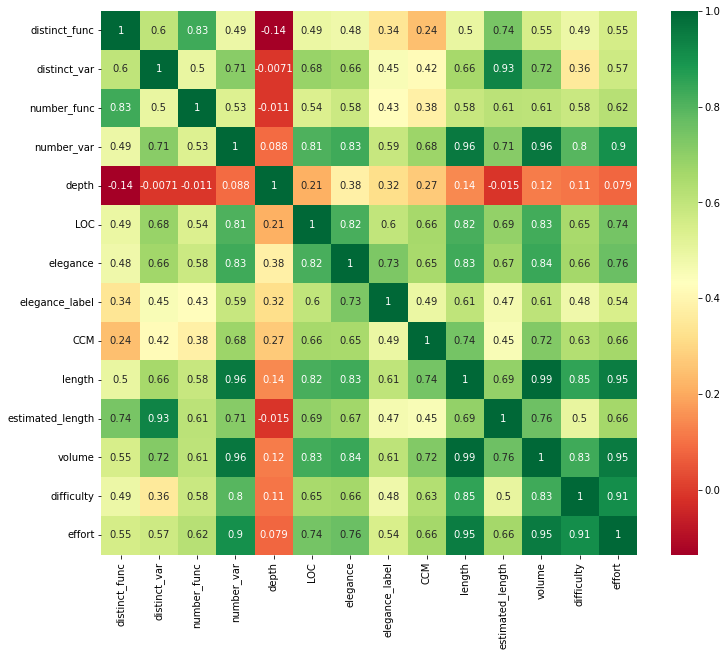

In [490]:
plt.figure(figsize=(12,10))
p=sns.heatmap(train_df.drop(['file'], axis=1).corr(), annot=True,cmap ='RdYlGn')

In [491]:
drop = ['file', 'elegance']

# drop = ['file', 'estimated_length']

# drop = ['file', 'distinct_func', 'estimated_length']

# drop = ['file', 'distinct_var', 'estimated_length']

# drop = ['file', 'distinct_func', 'distinct_var', 'estimated_length']

In [492]:
X_train = train_df.drop(drop+['elegance_label'], axis=1)
y_train = train_df['elegance_label']

X_test = test_df.drop(drop+['elegance_label'], axis=1)
y_test = test_df['elegance_label']

In [440]:
def check(y_test, y_pred):
    test_list = list(y_test)
    pred_list = list(y_pred)
    pred0_ans2 = 0
    pred0_ans1 = 0
    pred2_ans1 = 0
    pred2_ans0 = 0
    pred1_ans2 = 0
    pred1_ans0 = 0
    ans1 = 0
    ans2 = 0
    ans0 = 0
    for i in range(len(y_test)):
        if test_list[i] == 2 and pred_list[i] == 2:
            ans2 += 1
        if test_list[i] == 1 and pred_list[i] == 1:
            ans1 += 1
        if test_list[i] == 0 and pred_list[i] == 0:
            ans0 += 1
        if test_list[i] == 2 and pred_list[i] == 0:
            pred0_ans2 += 1
        if test_list[i] == 1 and pred_list[i] == 0:
            pred0_ans1 += 1
        if test_list[i] == 0 and pred_list[i] == 2:
            pred2_ans0 += 1
        if test_list[i] == 1 and pred_list[i] == 2:
            pred2_ans1 += 1
        if test_list[i] == 2 and pred_list[i] == 1:
            pred1_ans2 += 1
        if test_list[i] == 0 and pred_list[i] == 1:
            pred1_ans0 += 1
    print(f"2인데 0으로 예측: {pred0_ans2/len(test_list)}, 0인데 2로 예측: {pred2_ans0/len(test_list)}")
    print(f"2인데 1으로 예측: {pred1_ans2/len(test_list)}, 1인데 2로 예측: {pred2_ans1/len(test_list)}")
    print(f"1인데 0으로 예측: {pred0_ans1/len(test_list)}, 0인데 1로 예측: {pred1_ans0/len(test_list)}")
    
    print(f"ans0:{ans0/len(test_list)}, ans1:{ans1/len(test_list)}, ans2:{ans2/len(test_list)}")

In [441]:
import tensorflow as tf

tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
18/18 [==============================] - 1s 14ms/step - loss: 1.1559 - accuracy: 0.2214 - val_loss: 1.0288 - val_accuracy: 0.8252
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 0.9957 - accuracy: 0.7153 - val_loss: 0.9216 - val_accuracy: 0.8322
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.8439 - accuracy: 0.8102 - val_loss: 0.7261 - val_accuracy: 0.8322
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6939 - accuracy: 0.8313 - val_loss: 0.5777 - val_accuracy: 0.8531
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6249 - accuracy: 0.8383 - val_loss: 0.5237 - val_accuracy: 0.8531
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5303 - accuracy: 0.8559 - val_loss: 0.4665 - val_accuracy: 0.8601
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5140 - accuracy: 0.8594 - val_loss: 0.4427 - val_accuracy: 0.8531
Epoch 8/100


Epoch 59/100
18/18 [==============================] - 0s 4ms/step - loss: 0.2717 - accuracy: 0.8928 - val_loss: 0.3097 - val_accuracy: 0.8601
Epoch 60/100
18/18 [==============================] - 0s 3ms/step - loss: 0.2651 - accuracy: 0.8963 - val_loss: 0.2938 - val_accuracy: 0.8671
Epoch 61/100
18/18 [==============================] - 0s 3ms/step - loss: 0.2696 - accuracy: 0.8963 - val_loss: 0.3092 - val_accuracy: 0.8531
Epoch 62/100
18/18 [==============================] - 0s 4ms/step - loss: 0.2728 - accuracy: 0.8840 - val_loss: 0.2943 - val_accuracy: 0.8531
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 0.2724 - accuracy: 0.8998 - val_loss: 0.3328 - val_accuracy: 0.8671
Epoch 64/100
18/18 [==============================] - 0s 4ms/step - loss: 0.2790 - accuracy: 0.8875 - val_loss: 0.2973 - val_accuracy: 0.8671
Epoch 65/100
18/18 [==============================] - 0s 4ms/step - loss: 0.2701 - accuracy: 0.8981 - val_loss: 0.2964 - val_accuracy: 0.8741
Epoch 

In [442]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


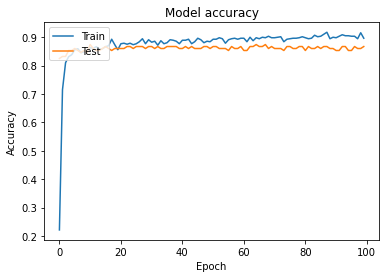

In [443]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [493]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {score}')
check(y_test, y_pred)

2/2 [==============================] - 0s 3ms/step
Accuracy: 0.9696969696969697
2인데 0으로 예측: 0.0, 0인데 2로 예측: 0.0
2인데 1으로 예측: 0.0, 1인데 2로 예측: 0.0
1인데 0으로 예측: 0.0, 0인데 1로 예측: 0.030303030303030304
ans0:0.0, ans1:0.696969696969697, ans2:0.2727272727272727


In [494]:
y_pred

array([2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1], dtype=int64)

In [495]:
np.array(y_test)

array([2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1], dtype=int64)

In [447]:
for i in range(test_df.shape[0]):
    if y_test[i] != y_pred[i]:
        print(f'{test_df.file[i]} {y_test[i]} -> {y_pred[i]}')

201824558.cpp 0 -> 1


In [499]:
len(test_df[test_df['elegance_label']==2])

9

In [475]:
train_df.shape

(712, 15)

In [473]:
train_df.drop(['file', 'elegance_label'], axis=1)

,distinct_func,distinct_var,number_func,number_var,depth,LOC,elegance,CCM,length,estimated_length,volume,difficulty,effort
0,-0.708933,-0.848808,-0.672888,-1.071944,-0.840663,-1.090679,-1.188388,-1.415203,-1.171588,-0.677609,-1.125891,-0.800165,-0.733395
1,-0.386053,-0.287007,-0.201525,0.074787,0.126099,-0.422842,-0.258526,0.533879,0.086679,-0.552696,-0.003704,0.132289,-0.056044
2,-0.386053,1.117496,-0.515767,1.603761,1.092862,1.246750,1.978106,1.703329,1.426651,0.379574,1.341602,0.612307,0.738068
3,-0.708933,-0.567908,-0.672888,-0.798913,1.092862,-0.255883,-0.793925,-0.635570,-0.812083,-0.692231,-0.810563,-0.858864,-0.654092
4,2.842753,2.802900,1.841049,3.241948,-0.840663,2.665904,2.630756,3.262595,3.779774,3.932483,4.127159,4.818422,5.499688
...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,-0.099926,0.357004,-0.038089,-0.544758,-0.217186,0.547456,-0.199526,-0.500754,-0.612827,-0.030331,-0.533829,-0.765428,-0.553167
708,0.184479,0.692830,-0.214252,-0.018294,1.389991,0.109491,0.617197,-0.064803,-0.268359,0.078509,-0.230530,-0.492889,-0.382426
709,-0.099926,-0.650474,-0.390414,0.683657,-0.217186,0.182485,0.306240,1.679000,1.152570,-0.242059,0.894978,1.449497,0.926638
710,-0.099926,0.021178,0.138073,0.508170,1.389991,0.109491,0.988297,1.243049,0.265566,0.140570,0.228765,0.822820,0.270484


In [500]:
model.save('cpp_elegance_model.h5')